<a href="https://colab.research.google.com/github/tlum1/movie_recommend_system/blob/main/%D0%9A%D0%B0%D0%BA_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%D0%B5%D1%82_%D0%BA%D0%BE%D0%BB%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импортирование нужных библиотек

In [2]:
import pandas as pd
import numpy as np

# Данные

Создадим небольшой датасет, в котором будут оценки пользователей на конкретные фильмы

In [3]:
df = pd.DataFrame({
    "user": ["Дашуля", "Фридман", "Ася", "Дмитрий Юрьевич", "Иван", "Дашуля", "Фридман", "Ася", "Дмитрий Юрьевич", "Иван", "Дашуля", "Ася", "Иван", "Дашуля", "Фридман", "Дмитрий Юрьевич", "Иван", "Дашуля", "Фридман", "Ася", "Дмитрий Юрьевич"],
    "movie": ["Математики","Математики","Математики","Математики","Страх и ненависть на дифурах ", "Страх и ненависть на дифурах ","Страх и ненависть на дифурах ","Страх и ненависть на дифурах ","Страх и ненависть на дифурах ","Once Upon a Applied Math", "Once Upon a Applied Math",  "Once Upon a Applied Math", "Функции, производные, две матрицы","Функции, производные, две матрицы","Функции, производные, две матрицы","Функции, производные, две матрицы","Не грози южному централу, решая уравнения у себя в квартале", "Не грози южному централу, решая уравнения у себя в квартале","Не грози южному централу, решая уравнения у себя в квартале","Не грози южному централу, решая уравнения у себя в квартале", "Не грози южному централу, решая уравнения у себя в квартале"],
    "rating": [3, 5, 5, 2, 3, 5, 3, 5, 3, 4, 2, 5, 5, 2, 4, 2, 2, 5, 3, 4, 2]
})
df

,user,movie,rating
0,Дашуля,Математики,3
1,Фридман,Математики,5
2,Ася,Математики,5
3,Дмитрий Юрьевич,Математики,2
4,Иван,Страх и ненависть на дифурах,3
5,Дашуля,Страх и ненависть на дифурах,5
6,Фридман,Страх и ненависть на дифурах,3
7,Ася,Страх и ненависть на дифурах,5
8,Дмитрий Юрьевич,Страх и ненависть на дифурах,3
9,Иван,Once Upon a Applied Math,4


Построим **матрицу смежности** для оценок пользователей

In [113]:
interact_matrix = pd.pivot_table(df, index="user", columns="movie", values="rating")
source_interact_matrix = interact_matrix.copy()
interact_matrix

movie,Once Upon a Applied Math,Математики,"Не грози южному централу, решая уравнения у себя в квартале",Страх и ненависть на дифурах,"Функции, производные, две матрицы"
user,,,,,
Ася,5.0,5.0,4.0,5.0,NaN
Дашуля,2.0,3.0,5.0,5.0,2.0
Дмитрий Юрьевич,NaN,2.0,2.0,3.0,2.0
Иван,4.0,NaN,2.0,3.0,5.0
Фридман,NaN,5.0,3.0,3.0,4.0


Обнулим среднуюю оценку для каждого польщователя
Так как каждый пользователь оценивает фильмы *по-своему*, то некоторые оценки могут быть информативны, а некоторые нет. Например, для пользователя, который ставит оценки ``8-10`` почти всем фильмам высокие оценки не информативны, в отличие от низких  ``0-4``

In [5]:
for i in range(len(interact_matrix)):
    interact_matrix.iloc[i] -= interact_matrix.iloc[i].mean()
interact_matrix.fillna(0, inplace=True)
interact_matrix

movie,Once Upon a Applied Math,Математики,"Не грози южному централу, решая уравнения у себя в квартале",Страх и ненависть на дифурах,"Функции, производные, две матрицы"
user,,,,,
Ася,0.25,0.25,-0.75,0.25,0.00
Дашуля,-1.40,-0.40,1.60,1.60,-1.40
Дмитрий Юрьевич,0.00,-0.25,-0.25,0.75,-0.25
Иван,0.50,0.00,-1.50,-0.50,1.50
Фридман,0.00,1.25,-0.75,-0.75,0.25


Создадим словарь, где ключем будет индекс столбца фильма, а значением его название

In [6]:
columns = source_interact_matrix.columns
id_to_movie = {i: columns[i] for i in range(len(columns))}
id_to_movie

{0: 'Once Upon a Applied Math',
 1: 'Математики',
 2: 'Не грози южному централу, решая уравнения у себя в квартале',
 3: 'Страх и ненависть на дифурах ',
 4: 'Функции, производные, две матрицы'}

# Построим модель колаборативной фильтрации

Импортируем метрику схожести объектов, в данном случае будем просто считать косинус угла между векторами, тем самым чем ближе косинус угла между векторами к **единице**, тем больше они похожи

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

Попробуем предсказать оценку **Ивана** на фильм **Математики**

Все пропущенные значения заменим на среднюю оценку **Ивана**

In [8]:
ivan_ratings = source_interact_matrix.loc["Иван"].values
# создадим вектор, где 0 фильм - который Иван еще не оценил и 1 - фильм уже оценный Иваном
ivan_watched  = np.zeros((5))
ivan_watched[~np.isnan(ivan_ratings)] = 1

# Заполним пропущенные значения средним
ivan_ratings[np.isnan(ivan_ratings)] = np.nanmean(ivan_ratings)
ivan_ratings

array([4. , 3.5, 2. , 3. , 5. ])

In [9]:
ivan_ratings.shape, ivan_watched.shape

((5,), (5,))

## user-based фильтрация

Построим матрицу схожести каждого пользователя с каждым

In [10]:
user_based_sim = cosine_similarity(interact_matrix)
np.fill_diagonal(user_based_sim, 0)
user_based_sim

array([[ 0.        , -0.47586687,  0.41666667,  0.5809475 ,  0.47871355],
       [-0.47586687,  0.        ,  0.47586687, -0.88465174, -0.64613475],
       [ 0.41666667,  0.47586687,  0.        , -0.19364917, -0.52223297],
       [ 0.5809475 , -0.88465174, -0.19364917,  0.        ,  0.5056499 ],
       [ 0.47871355, -0.64613475, -0.52223297,  0.5056499 ,  0.        ]])

**Как происходит оценка оценка рейтинга для фильму?**

Простой и логичный подход – приблизить новый рейтинг как средний рейтинг данного пользователя плюс отклонения от среднего рейтингов других пользователей, взвешенных этими самыми весами

$$r_{i, a} = \overline{r_i} + \frac{∑(r_{j, a} - \overline{r_j})*w_{i, j}}{∑|w_{i, j}|}$$

$\overline{r_i}$ - средний рейтинг пользователя

$w_{i, j}$ - "похожесть" между полльзователями

Возьмем строку из ``user_based_sim``, где рассчитаны соседи **Ивана**

In [11]:
ivan_sim = user_based_sim[3]

In [12]:
pred = ivan_ratings.mean() + interact_matrix.T.dot(ivan_sim) / abs(ivan_sim).sum()
for movie, rating in pred.items():
    print(f"Фильм: {movie},\nПредсказанная оценка: {rating}")

Фильм: Once Upon a Applied Math,
Предсказанная оценка: 4.139175200633995
Фильм: Математики,
Предсказанная оценка: 4.044862653131029
Фильм: Не грози южному централу, решая уравнения у себя в квартале,
Предсказанная оценка: 2.4921103761311945
Фильм: Страх и ненависть на дифурах ,
Предсказанная оценка: 2.6710094653312604
Фильм: Функции, производные, две матрицы,
Предсказанная оценка: 4.152842304772522


Таким образом мы видим, что **Иван** поставит фильму **Математики** оценку ``4``

## item-based фильтрация

Построим матрицу схожести каждого фильма с каждым

In [13]:
item_based_sim = cosine_similarity(interact_matrix.transpose())
np.fill_diagonal(item_based_sim, 0)
item_based_sim

array([[ 0.        ,  0.30380519, -0.86069342, -0.80540265,  0.86342137],
       [ 0.30380519,  0.        , -0.51145776, -0.62647055,  0.33038843],
       [-0.86069342, -0.51145776,  0.        ,  0.71429623, -0.90509054],
       [-0.80540265, -0.62647055,  0.71429623,  0.        , -0.80834412],
       [ 0.86342137,  0.33038843, -0.90509054, -0.80834412,  0.        ]])

**Теперь займемся предсказаниями оценок**

Чтобы предсказывать оценку пользователя на конретный фильм можем воспользоваться формулой. Это просто-напросто среднее взвешенное уже оценненых фильмов **Иваном** плюс средняя оценка **Фильма**, оценку на который мы пытаемся предсказать

$$r_i = \overline{r_i} + \frac{\sum(r_b - \overline{r_i})*w_{ab}}{∑|w_{ab}|}$$

$\overline{r_i}$ - средний рейтинг фильма

$w_{ab}$ - "похожесть" между объектами

Таким образом, из этой формулы ясно, что достаточно умножить матрицу ``item-item`` на вектор оценок польователя, где все пропущенные значения заменены средней оценкой пользователя

In [116]:
pred = interact_matrix.mean(axis=0) + (item_based_sim.dot(ivan_ratings - ivan_ratings.mean()) / abs(item_based_sim).dot(ivan_watched))
for i in range(len(pred)):
    print(f"Фильм: {id_to_movie[i]},\nПредсказанная оценка: {pred[i]}")

Фильм: Once Upon a Applied Math,
Предсказанная оценка: 4.8482649674771725
Фильм: Математики,
Предсказанная оценка: 4.725049812455768
Фильм: Не грози южному централу, решая уравнения у себя в квартале,
Предсказанная оценка: 2.3350559379937446
Фильм: Страх и ненависть на дифурах ,
Предсказанная оценка: 2.6459569490932937
Фильм: Функции, производные, две матрицы,
Предсказанная оценка: 4.101238303975564


Таким образом мы видим, что **Иван** поставит фильму **Математики** оценку ``4.7``

## Матричное разложение. Использование модели SVD++

Модель SVD++ представляет собой следующую стркуткуру

$$Y = \mu  + B_{item} + B_{user} + UV^T$$

$Y$ --- Матрица предсказанных оценок пользователей

$\mu$ --- средняя оценка по всей базе

$B_{item}$ --- вектор размера $m$ базовых предикторов для объектов

$B_{user}$ --- вектор размера $n$ базовых предикторов для пользователей
 
$U$ --- Матрица $n × k$ факторов пользователей

$V$ --- Матрица $m × k$ факторов объектов 

То есть, рейтинг {i}-го пользователя на $a$-ый фильм будет высчитываться следующим образом

$$r_{i,a} = \mu + b_i + b_a + u_iv_{a}^T$$

Таким образом, с помощью SVD-разложения мы сокращаем признаковое пространство, при этом стараясь сохранить как можно больше информации об объектах. К примеру, в магазине фруктов у нас продаются только яблоки (разных цветов и сортов), а также апельсины (тоже разных цветов и сортов), тогда мы можем сократить наше признаковое пространство до $n$-мерного до 2-мерного, таким образом мы сможем ускорить вычисления, потеряв минимум информации

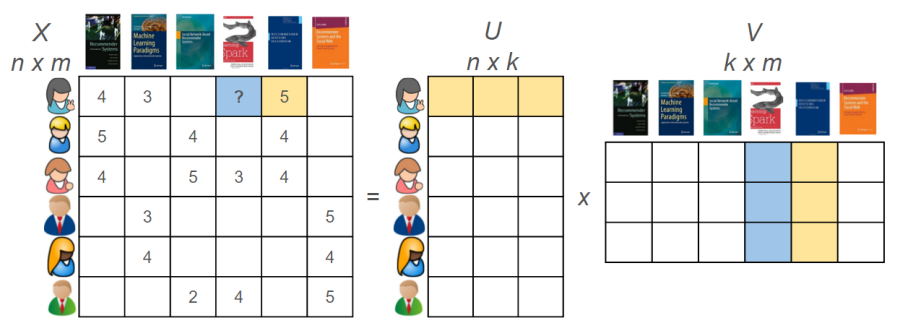

Обучать модель будем при помощи градиентного спуска. 

В качестве функции потерь будем использовать ``MSE``.

$$MSE = \frac{∑(y_{true} - y_{pred})^2}{n}$$

Выпишем нашу функцию потерь

$$Loss(\mu, B_{user}, B_{item}, U, V) = \frac{∑(Y_{true} - Y_{pred})^2}{n} = \frac{∑(Y_{true} - \mu - B_{item} - B_{user} - UV^T)^2}{n}$$

Запишем правила, по которым мы будем изменять параметры

$B_{user} = B_{user} + \alpha*err$

$B_{item} = B_{item} + \alpha*err$

$U = U + \alpha * err * V$

$V = V + \alpha * err * U$

Создадим класс, который будет имплементировать модель SVD++

In [78]:
import matplotlib.pyplot as plt

In [101]:
class SVD_pp():
    def __init__(self, k, users, items):
        """Инициализация параметров модели"""
        self.u = np.random.rand(users, k)
        self.v = np.random.rand(items, k)
        self.b_users = np.random.rand(users)
        self.b_items = np.random.rand(items)
        self.mu = np.random.random()
    
    def predict(self, user_id, item_id):
        """Предсказание оценки пользователя user_id для объекта item_id"""
        pred = self.mu + self.b_users[user_id] + self.b_items[item_id] + self.u[user_id].dot(self.v[item_id])
        return pred

    def draw_error_plot(self, errors):
        """Отрисовка графика изменения ошибки"""
        plt.plot(errors)
        plt.title("Error dynamic")
        plt.xlabel("iteration")
        plt.ylabel("error")
        plt.show()


    def gradient_descent(self, interact_matrix, max_iter, lr, l2_reg):
        """Градиентный спуск"""
        mse = 1
        errors = []
        total_ratings = (~np.isnan(interact_matrix)).sum()
        for iter in range(max_iter + 1):
            for i in range(interact_matrix.shape[0]):
                for j in range(interact_matrix.shape[1]):
                    # Если существует оценка i-го пользовальтеля на j-ый фильм 
                    if not np.isnan(interact_matrix[i][j]):
                        err = interact_matrix[i][j] - self.mu - self.b_users[i] - self.b_items[j] - self.u[i].dot(self.v[j])
                        mse += err * err
                        # обновим параметры
                        self.b_users[i] += lr * (err - l2_reg * self.b_users[i])
                        self.b_items[j] += lr * (err - l2_reg *  self.b_items[j])
                        self.u[i] += lr * (err * self.v[j] - l2_reg * self.u[i])
                        self.v[j] += lr * (err * self.u[i] - l2_reg * self.v[j])
            mse /= total_ratings
            if iter % 100 == 0:
                print(f"Iteration #{iter}, MSE: {mse}")
            errors.append(mse)
            mse = 0
        
        self.draw_error_plot(errors)


In [110]:
my_svd = SVD_pp(2, 5, 5)

Iteration #0, MSE: 3.2315412004432438
Iteration #100, MSE: 0.06687810620068586
Iteration #200, MSE: 0.05279998877070751
Iteration #300, MSE: 0.046395682626671535
Iteration #400, MSE: 0.03956795507874816
Iteration #500, MSE: 0.03280809231025287
Iteration #600, MSE: 0.02666381559764196
Iteration #700, MSE: 0.02147393471102281
Iteration #800, MSE: 0.017333661337967966
Iteration #900, MSE: 0.014163579298561043
Iteration #1000, MSE: 0.011798768014154238


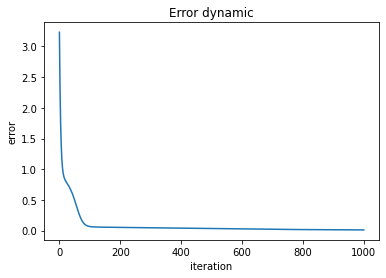

In [111]:
my_svd.gradient_descent(interact_matrix.values, 1000, 0.01, 0)

Предскажем оценку **Ивана** на фильм **математики**

In [112]:
my_svd.predict(user_id=3, item_id=1)

4.3781496297893705